In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
#for check null--
df["TotalCharges"].unique()
df["TotalCharges"].isnull().any()

#for check empty--
df["TotalCharges"].isnull().sum()
(df["TotalCharges"] == "").sum()

np.int64(0)


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#For All Column--
df.isnull().sum()

#User OverAll--
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
#for over all--
df.duplicated().sum()
#for specific column--
df["customerID"].duplicated().sum()

np.int64(0)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [ ]:
#In csv file SeniorCitizen data before show 0 and 1 AND now(after code) convered into yes or no
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)    

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


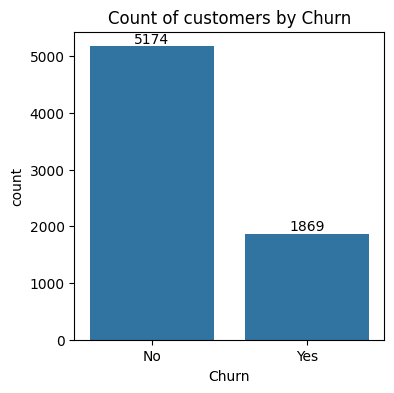

In [53]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

In [20]:
gb=df.groupby("Churn").agg({"Churn":"count"})
gb

  #Both are same-----

# gb = df.groupby("Churn")["Churn"].count()
# gb


,Churn
Churn,
No,5174
Yes,1869


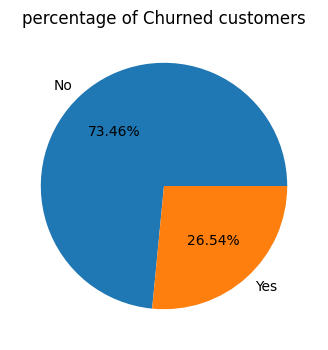

In [47]:
plt.figure(figsize=(4,4))
plt.pie(gb["Churn"], labels=gb.index, autopct = "%1.2f%%")
plt.title("percentage of Churned customers", fontsize =12)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customer have churned out. #not let's explore the reason behind it

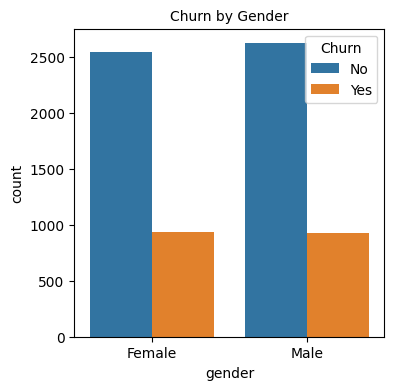

In [56]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data = df, hue="Churn")
plt.title("Churn by Gender", fontsize=10)
plt.show()

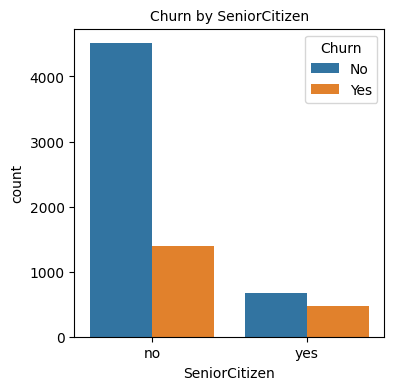

In [65]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", data = df, hue="Churn")
plt.title("Churn by SeniorCitizen", fontsize=10)
plt.show()

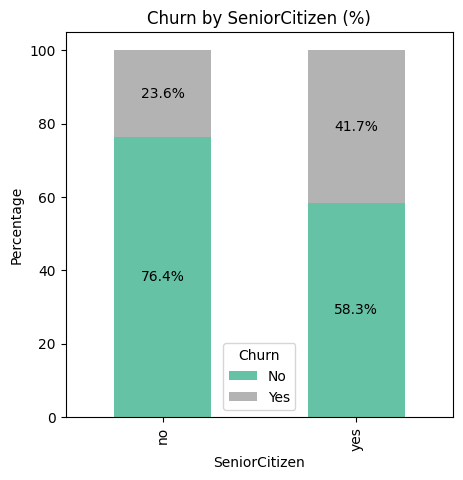

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# cross-tab with normalize='index' gives percentage per SeniorCitizen
cross_tab = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100

# plot stacked bar
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(5,5), colormap="Set2")

# add percentages as labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (%)", fontsize=12)
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn")
plt.show()


#comparative greater percentage of people in senior citizen category have churned

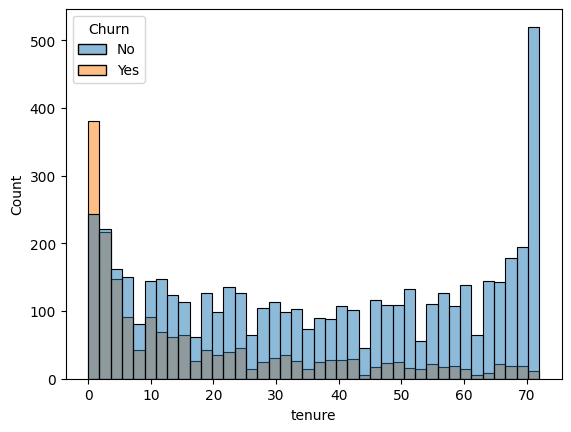

In [64]:
sns.histplot(x= "tenure", data = df, bins=40, hue="Churn")
plt.show()

#people who have used our services foe a long time have stayed and people who have use our services #1 or 2 monts have churned


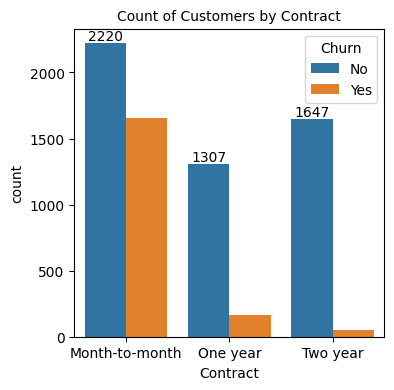

In [70]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data = df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract", fontsize=10)
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [4]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

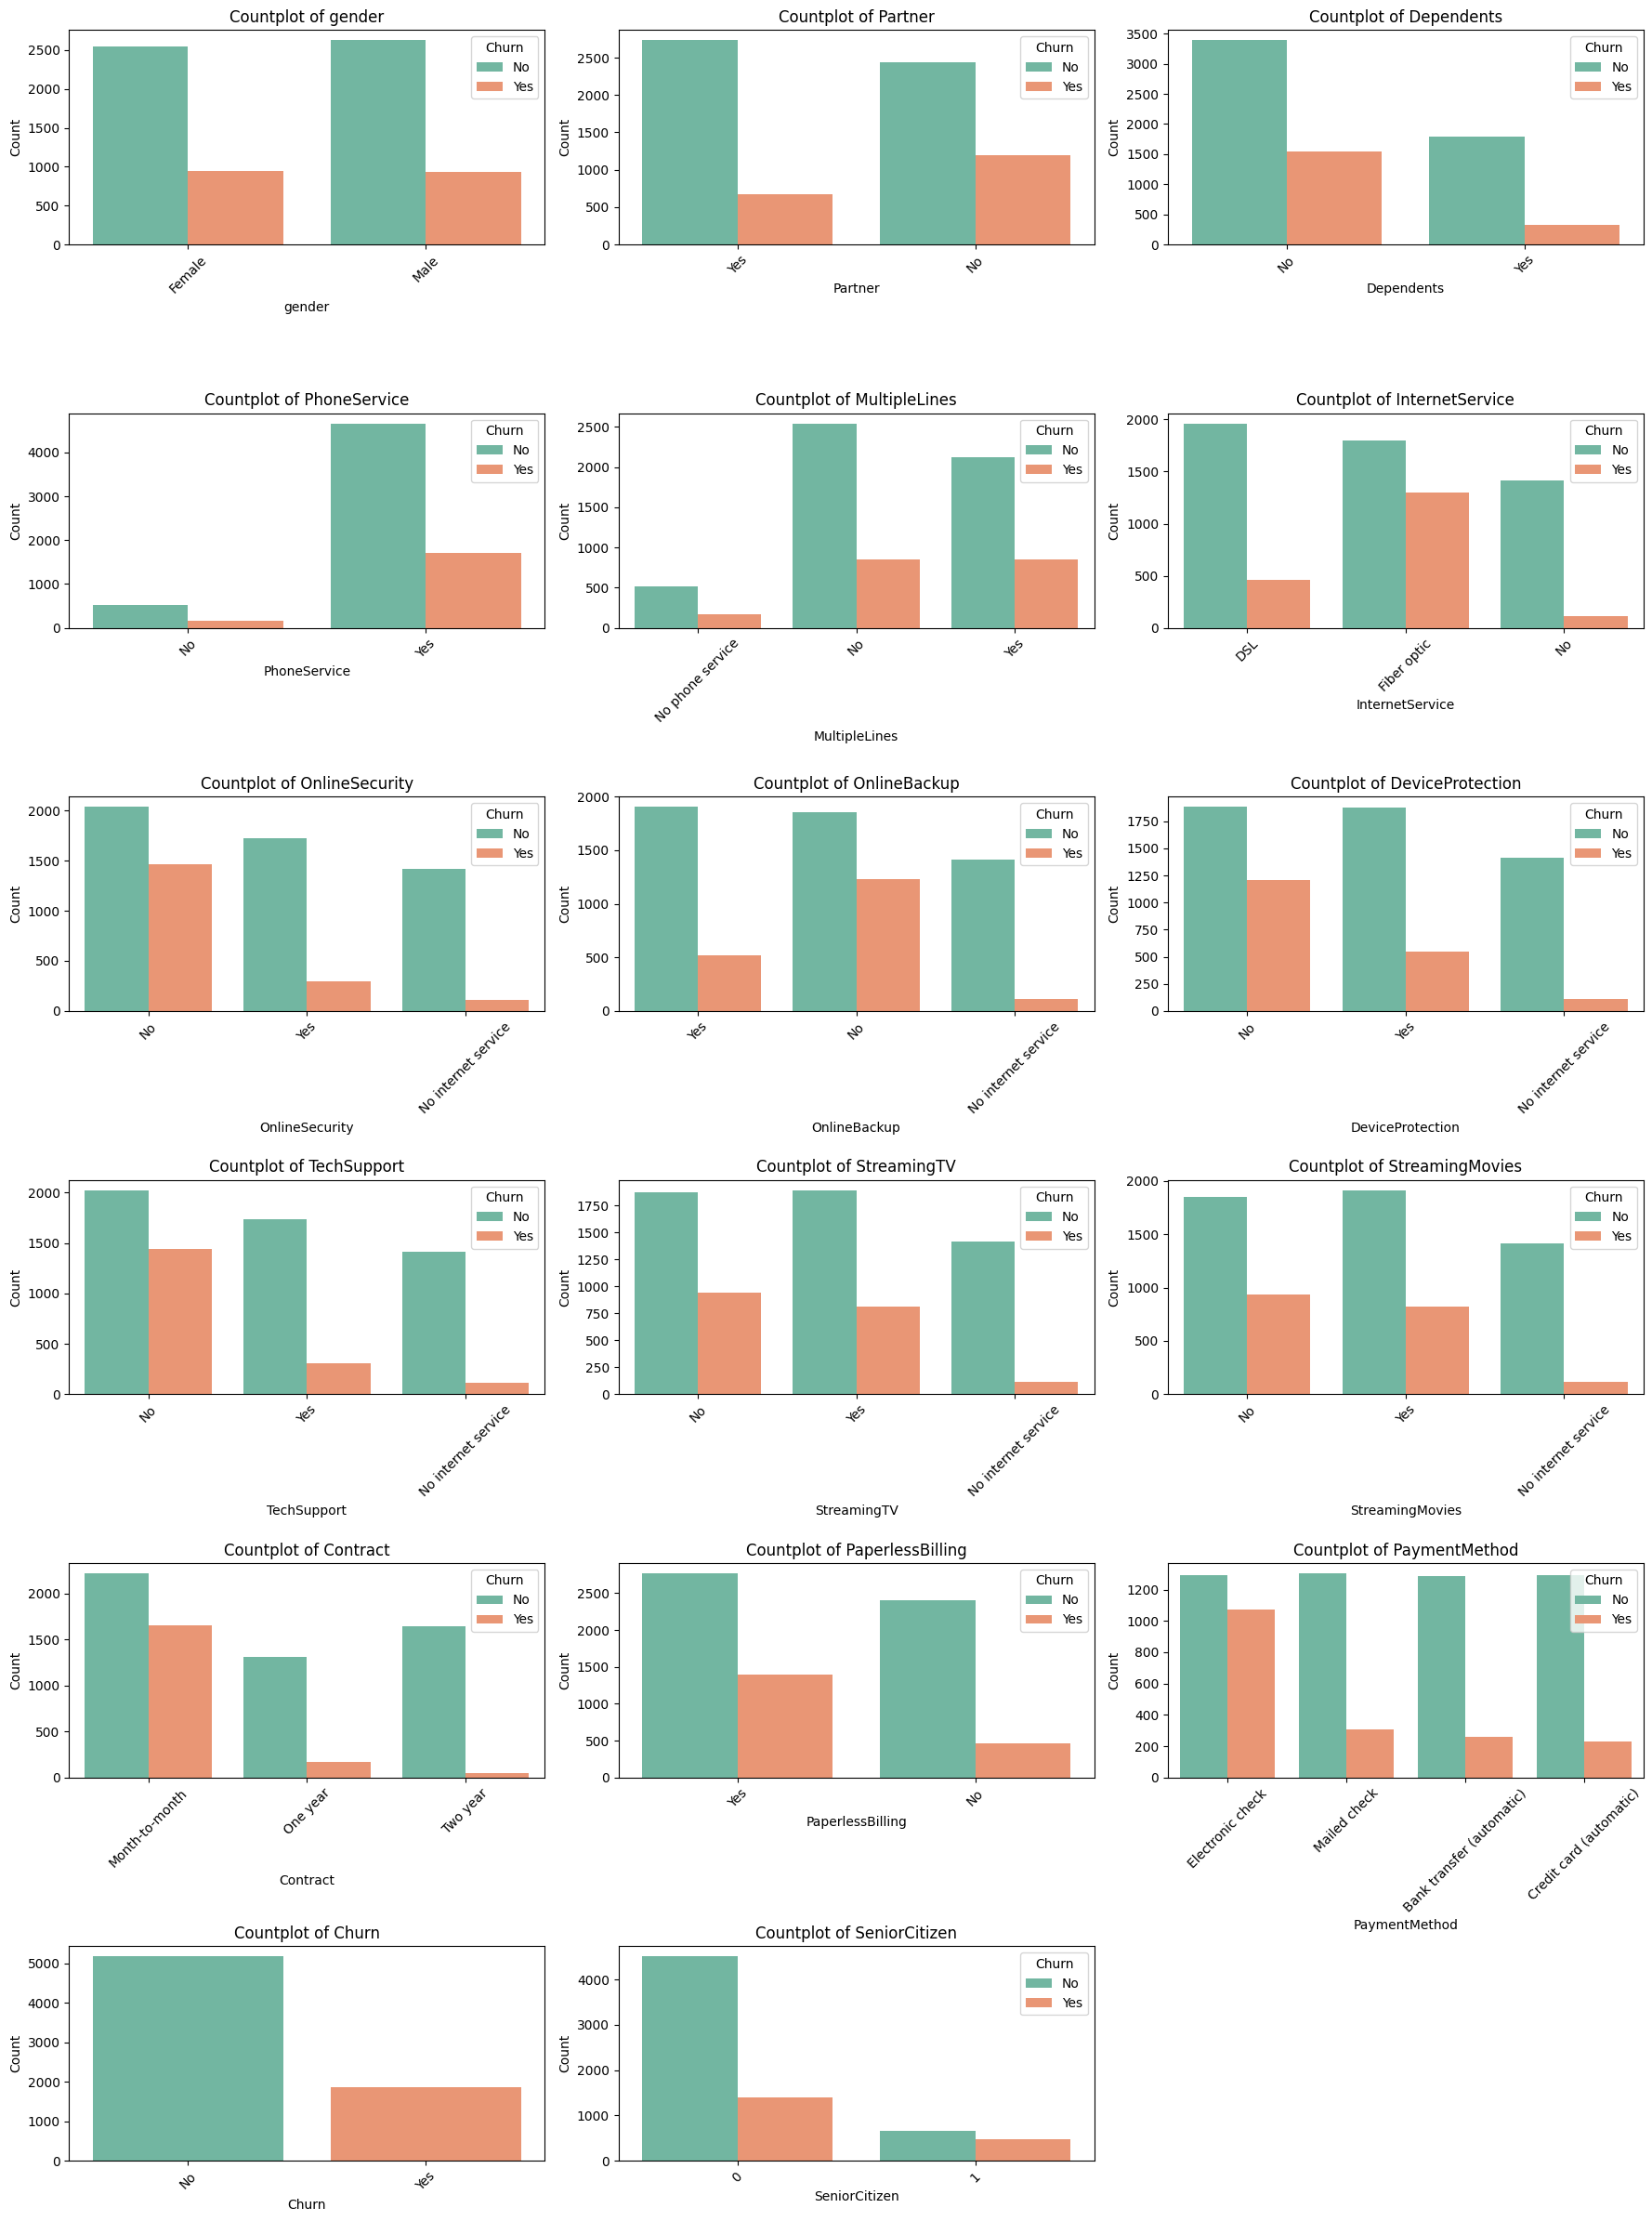

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Drop columns that are ID-like or numeric (not suitable for countplot)
exclude = ["customerID", "tenure", "MonthlyCharges", "TotalCharges"]

# Select only categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == "object" and col not in exclude]

# Also include SeniorCitizen (0/1 → categorical)
cat_cols.append("SeniorCitizen")

# Grid size
n = len(cat_cols)
rows = (n // 3) + 1
cols = 3

# Plot
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Set2", hue="Churn")
    axes[i].set_title(f"Countplot of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

# Hide extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




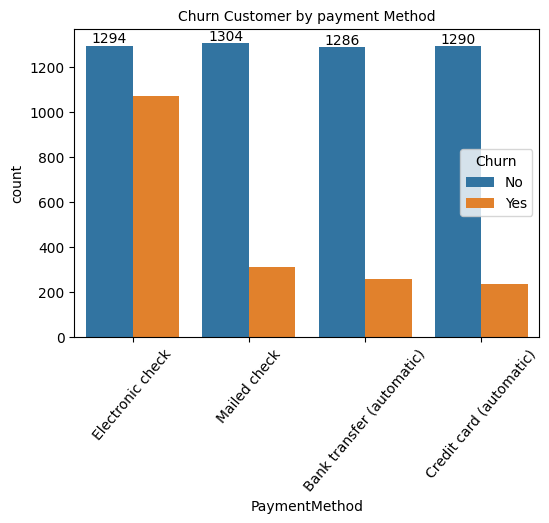

In [17]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data = df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=50)

plt.title("Churn Customer by payment Method", fontsize=10)
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method